# SIADS 521: Assignment 3

Spring/Summer 2021<br>
created by: Daniel Best, dabest@umich.edu

# Visualizing baby name popularity over time
The goal of this workbook is to visualize baby name frequencies over time.  I will be using data from the social security administration, which contains baby names and their frequency, from years 1880 to 2020.

SSA's interactive baby name website:https://www.ssa.gov/oact/babynames/index.html<br>
datasets: https://www.ssa.gov/oact/babynames/limits.html

# Visualization Technique:


The techniques I plan to use are: <br>
Stacked Area Chart<br>
Streamgraph Chart<br>

<font color=blue> Details about these techniques:  </font><br>
Area charts combine the visualization techniques of line and bar charts to show how a value or quantity changes with <br> respect to another field or interval.  Stacked area charts allow for mutiple groups to be displayed on the same chart. <br> On stacked area charts, the entire shaded area represents the total number of observations, and the height of a <br> particular color represents the value for that particular group at that point.  These charts are valuable because they<br> allow the viewer to observe fluctuations over time, and you can see how the sizes and proportions of different groups <br> vary over time.<br>
A streamgraph is very similar to the stacked area chart, but it is not displayed against a fixed y-axis. Instead, a <br> streamgraph is centered and is allowed to grow and shrink along this central axis.  Streamgraphs are also good for <br> high volume data with many categories in order to track their relative sizes against another field, usually a time <br> value.<br>

Stacked area and streamgraphs are ***not*** good for showing changes in exact values over time.  Due to their stacked <br> nature, it can be difficult to determine if a given group's value is remaining constant, increasing, or decreasing over <br> time.  These charts are best for relative comparisons and looking at proportions of various groups.<br>

## Visualization Library
The library I'm using is pyecharts.

<font color=orange>--Details on pyecharts.</font><br>

Source: https://pyecharts.org/#/en-us/<br>
Pyecharts states that they leverage E charts, an "easy-to-use, highly interactive and highly performant javascript <br> visualization library under Apache license" and combine it with the python language.  Pyecharts was first released <br>
in 2017, and is available as open source under the MIT license.  Pyecharts has 3 developers based out of China, and <br>
may be contacted here: chenjiandongx@qq.com<br>

Pyecharts is procedural, and allows the developer to build on to a visualization, adding data, axes, labels, etc. before finally rendering the viz.  The visualizations are rendered as HTML and can be saved to a file.

Here are some other features from the pyecharts readme (source: https://github.com/pyecharts/pyecharts/blob/master/README.en.md)<br>
"Simple API, Sleek and method chaining<br>
Support 30 + popular charts<br>
Support data science tools: Jupyter Notebook, JupyterLab, nteract<br>
Integrate with Flask，Django at ease<br>
Easy to use and highly configurable<br>
Detailed documentation and examples.<br>
More than 400+ geomaps assets for geograpic information processing"<br>

Why I chose pyecharts:  <br>
It is actually quite easy to produce a stacked area chart in python.  The Pandas package includes a method that will produce <br>
the chart in a single line of code, and you will get a basic chart with a legend.  For my use case of visualizing baby <br> names across time, this basic functionality is not enough, and I wanted a visualization that would be more interactive and allow the viewer to hover over the <br>
charts to get more information.  Additionally, I wanted a package that I could use for both the area chart and the <br> streamgraph.  Pyecharts has all of this functionality and much more.  There are many different plots and charts <br>
available, and there are valuable examples of each one here: https://github.com/pyecharts/pyecharts-gallery<br>


<font color=red>To install:</font><br>
Go to the command line/Terminal and type: <br>
$ pip install pyecharts


# Demo

First I will read in and cleanse the data.  There are individual files for each year from 1880 to 2020.  The files are simple CSV format; each record in the individual annual files has the format "name,sex,number," where name is 2 to 15 characters, sex is M (male) or F (female) and "number" is the number of occurrences of the name in that year.

In [1]:
# Import pandas to read in data and handle all the data wrangling
import pandas as pd

In [2]:
# Assigning column names for the base dataset.  This first dataset will be joined to all other baby name files
colnames=['name','sex',1880]
df_base = pd.read_csv('data\yob1880.txt',header=None,names=colnames)

In [3]:
# Applying upper() to the name field to ensure all names are in the same case.  
# Filtering/separating male and female names into different dataFrames
df_base.loc[:,'name'] = df_base.loc[:,'name'].str.upper()
df_F = df_base.loc[df_base['sex']=='F',['name',1880]].set_index('name')
df_M = df_base.loc[df_base['sex']=='M',['name',1880]].set_index('name')

In [4]:
# Loop through every year available in the data and doing an outer join to the base dataFrame
for y in range(1881,2021,1):
    colnames=['name','sex',y]
    df_base = pd.read_csv('data\yob'+str(y)+'.txt',header=None,names=colnames)
    df_base.loc[:,'name'] = df_base.loc[:,'name'].str.upper()
    df_raw_F = df_base.loc[df_base['sex']=='F',['name',y]].set_index('name')
    df_raw_M = df_base.loc[df_base['sex']=='M',['name',y]].set_index('name')
    df_F = df_F.join(df_raw_F,how='outer')
    df_M = df_M.join(df_raw_M,how='outer')

In [5]:
# Some names are not present in all the data files.  To account for this I replace NaN values with 0
df_F.fillna(0,inplace=True)
df_M.fillna(0,inplace=True)

In [6]:
# I sort the dataFrame to order by the most popular names in 2020 and transpose to get one row per year
df_m_t = df_M.sort_values(by=2020, ascending=False).T
df_f_t = df_F.sort_values(by=2020, ascending=False).T

# Basic chart using Pandas area()

<AxesSubplot:>

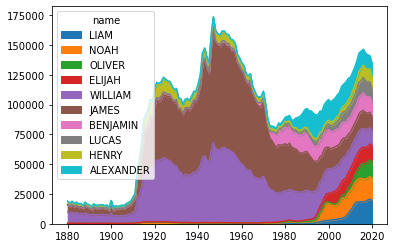

In [7]:
# Using pandas to show the basic stacked Area plot functionality
df_m_t.iloc[:,:10].plot.area()

<AxesSubplot:>

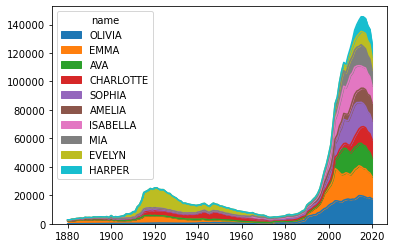

In [8]:
# Using pandas to show the basic stacked Area plot functionality
df_f_t.iloc[:,:10].plot.area()

The above chart is nice in that it is very easy to create in Pandas; however, it is static and lacks any advanced interactive features.<br>



# pyecharts Stacked Area Chart

Below, I will build the same style of stacked area chart in pyecharts.  The chart is actually built using the Line chart class.  The chart is customized for area when adding in the y-axis by setting the area style option (areastyle_opts) and it is stacked with stack="total"

In [9]:
import pyecharts.options as opts
from pyecharts.charts import Line


def plot_area_chart(df,s):
    x_data = list(df.index.astype(str))


    line = Line()
    (
        line
        .add_xaxis(xaxis_data=x_data)
        .set_global_opts(
            title_opts=opts.TitleOpts(title=s +" Names",pos_left=100, pos_top=100),
            tooltip_opts=opts.TooltipOpts(trigger="axis", axis_pointer_type="cross"),
            yaxis_opts=opts.AxisOpts(
                type_="value",
                axistick_opts=opts.AxisTickOpts(is_show=True),
                splitline_opts=opts.SplitLineOpts(is_show=True),
            ),
            xaxis_opts=opts.AxisOpts(type_="category", boundary_gap=False),
        )

    )
    for name in df.columns[:10]:
        line.add_yaxis(
            series_name=str(name),
            stack="total",
            y_axis=list(df[''+str(name)].astype(int)),
            areastyle_opts=opts.AreaStyleOpts(opacity=0.5),
            label_opts=opts.LabelOpts(is_show=False),
        )
    
    return line.render_notebook()

In [10]:
plot_area_chart(df_m_t,"Male")

In [11]:
plot_area_chart(df_f_t,"Female")

Above, I have plotted the area charts of top 10 Male and Female names of 2020 to show how their popularity has varied over time.  If you hover over the chart, you will see the individual counts for each name in that year.  Additionally, if you go to the Legend, and click on the bubble next to a name, you have the ability to toggle whether or not that name is included in the chart.  Play around with this feature, and watch how the chart adjusts up and down when names are removed and added back in!

# Streamgraph in pyecharts using the ThemeRiver class

The Streamgraph is similar to the stacked area chart above, but you'll notice that the fixed axis is removed, and instead the data is centered around a central horizontal axis.  As names become more popular the chart height increases and it's easy to follow treands over time.

The data required for this chart has a very specific format.  I create a list of tuples, where each tuple has a date, a value (frequency of name for that year), and a label, which is the name in our example.

In [12]:
# import the ThemeRiver class that can be used to create the streamgraph
from pyecharts.charts import ThemeRiver

def plot_streamgraph(df):
    x_data = [name for name in df.columns[:10]]
    y_data = []
    for name in df.columns[:10]:
        y_data = y_data + list(zip(df.index.astype(str)+'/12/31',df[name],[name]*len(df.index)))
    tr = ThemeRiver(init_opts=opts.InitOpts(width="900px", height="600px"))

    (
        tr.add(
            series_name=x_data,
            data=y_data,
            singleaxis_opts=opts.SingleAxisOpts(
                pos_top="50", pos_bottom="50", type_="time"
            ),
        )
        .set_global_opts(
            tooltip_opts=opts.TooltipOpts(trigger="axis", axis_pointer_type="line")
        )
        
    )
    return tr.render_notebook()

In [13]:
plot_streamgraph(df_m_t)

In [14]:
plot_streamgraph(df_f_t)